In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# loading dataset
df = pd.read_csv('C:/Users/21261/Desktop/Assignement_MLops/Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
# Data preprocessing
new_columns = ['Time','Gender','Age','Major','Year','CGPA','Marriage','Depression','Anxiety','Panic','Treatment']
df.columns = new_columns
print(df.columns)

Index(['Time', 'Gender', 'Age', 'Major', 'Year', 'CGPA', 'Marriage',
       'Depression', 'Anxiety', 'Panic', 'Treatment'],
      dtype='object')


In [4]:
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
# Detecting missing values
df.isna().sum()

Time          0
Gender        0
Age           1
Major         0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Time          0
Gender        0
Age           0
Major         0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

In [8]:
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [9]:
df.drop('Time',axis=1,inplace=True)

In [10]:
df.head()

,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [11]:
cols = ['Marriage','Depression','Panic','Anxiety','Treatment']

def check(x):
    if x == 'Yes':
        return 1
    else:
        return 0

for i in cols:
    df[i] = df[i].apply(lambda x:1 if x =='Yes' else 0)

In [12]:
df.head()

,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,Male,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,Female,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0


In [13]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [14]:
def change_cgpa(x):
    if (x == '3.50 - 4.00' or x == '3.50 - 4.00 '):
        x = 5
        return x
    elif x=='3.00 - 3.49' :
        x = 4
        return x
    elif x == '2.50 - 2.99':
        x = 3
        return x
    elif x== '2.00 - 2.49':
        x = 2
        return x
    else:
        x=1
        return x

df['CGPA'] = df['CGPA'].apply(lambda x:change_cgpa(x))

In [15]:
df.head()

,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,Female,18.0,Engineering,year 1,4,0,1,0,1,0
1,Male,21.0,Islamic education,year 2,4,0,0,1,0,0
2,Male,19.0,BIT,Year 1,4,0,1,1,1,0
3,Female,22.0,Laws,year 3,4,1,1,0,0,0
4,Male,23.0,Mathemathics,year 4,4,0,0,0,0,0


In [16]:
# 0 for female, 1 for male
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

In [17]:
df.head()

,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,0,18.0,Engineering,year 1,4,0,1,0,1,0
1,1,21.0,Islamic education,year 2,4,0,0,1,0,0
2,1,19.0,BIT,Year 1,4,0,1,1,1,0
3,0,22.0,Laws,year 3,4,1,1,0,0,0
4,1,23.0,Mathemathics,year 4,4,0,0,0,0,0


In [18]:
df['Major'].value_counts()

BCS                        18
Engineering                17
BIT                         9
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

In [19]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
df['Major'] = le.fit_transform(df['Major'])

In [20]:
df['Year']=df['Year'].apply(lambda x: int(x[-1:]))

In [21]:
df.head()

,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,0,18.0,17,1,4,0,1,0,1,0
1,1,21.0,25,2,4,0,0,1,0,0
2,1,19.0,4,1,4,0,1,1,1,0
3,0,22.0,33,3,4,1,1,0,0,0
4,1,23.0,37,4,4,0,0,0,0,0


In [22]:
# our dataset now is prepared for ML models

In [23]:
# Splitting the data
X = df.drop(['Depression'],axis=1).values
y = df['Depression'].values

In [24]:
X.shape

(100, 9)

In [25]:
y.shape

(100,)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Machine learning model :
from sklearn.metrics import accuracy_score

In [22]:
import sklearn
sklearn.__version__

'1.2.2'

In [29]:
# SVM
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

y_pred_svm = svm.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.9

In [30]:
# Descision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.65

In [31]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_score(y_test, y_pred_knn)

0.9

In [32]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.8

In [33]:
# Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)
accuracy_score(y_test, y_pred_gb)

0.8

In [34]:
# Picke le modele pour Flask et FastAPI
import pickle

pickle.dump(svm,open('classifier_svm.pkl','wb'))

In [35]:
# mlflow

In [36]:
!pip install --upgrade mlflow

In [37]:
# Based on the accuracy the best model is SVM

In [38]:
def evaluate(svm, X_test, y_test):
    eval_acc = svm.score(X_test, y_test)
    preds = svm.predict(X_test)
    auc_score = roc_auc_score(y_test, preds)
    mlflow.log_metric("eval_acc", eval_acc) # l'accuracy de test (evaluation)
    mlflow.log_metric("auc_score", auc_score)# l'AUC score 
    print(f"Auc Score: {auc_score:.3%}")
    print(f"Eval Accuracy: {eval_acc:.3%}")
    
    plt.clf()
    conf_matrix = confusion_matrix(y_test, preds)
    ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")
    plt.savefig("sklearn_conf_matrix.png")
    # nous avons dit à MLflow de sauvegarder ces deux figure afin de les consulter à chaque 
    # exécution d'une façon organisée comme nous allons le voir plus loin dans cet atelier  
    #mlflow.log_artifact("sklearn_roc_plot.png")
    mlflow.log_artifact("sklearn_conf_matrix.png")

C:\Users\21261\anaconda3\lib\site-packages\pydantic\_internal\_fields.py:149: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
C:\Users\21261\anaconda3\lib\site-packages\pydantic\_internal\_config.py:321: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


Train Accuracy: 86.250%
Auc Score: 80.000%
Eval Accuracy: 90.000%


2023/12/01 19:39:30 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\21261\AppData\Local\Temp\tmp22rhqn36\model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.2.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.
C:\Users\21261\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Model run:  689c53382f3f498d876b64468ff0bd8a


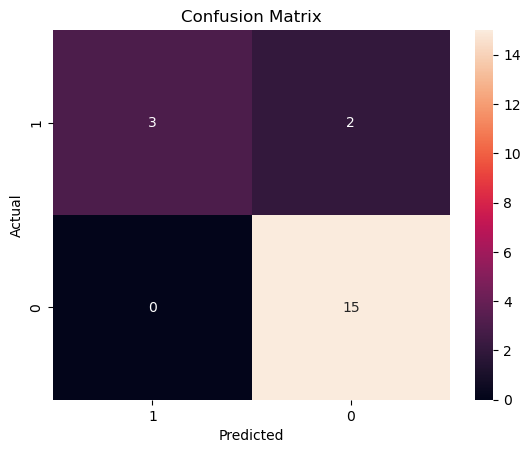

In [39]:
from sklearn import svm
from sklearn.metrics import roc_auc_score, RocCurveDisplay,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

svm = svm.SVC(random_state=None)

mlflow.set_experiment("scikit_learn_experiment")

with mlflow.start_run():
    params = {
    "max_iter": 300,
    "C": 2,
    "kernel" : 'linear', # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
    }
    mlflow.log_params(params)
    svm = svm.fit(X_train, y_train)
    train_acc = svm.score(X_train, y_train)
    mlflow.log_metric("train_acc", train_acc)
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(svm, X_test, y_test)
    mlflow.sklearn.log_model(svm, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

In [40]:
loaded_model = mlflow.sklearn.load_model("file:///C:/Users/21261/Desktop/Assignement_MLops/Dep_Flask/mlruns/738687252442002773/7636943e72514f6ea9cadd8821fea3e7/artifacts/log_reg_model")

In [41]:
loaded_model.score(X_test, y_test)

0.9

In [ ]:
from sklearn.svm import SVC
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx

# Convert the scikit-learn SVM model to ONNX format
initial_type = [('float_input', FloatTensorType([None, len(svm_model.support_vectors_[0])]))]
onnx_model = convert_sklearn(svm, initial_types=initial_type)

# Specify the path where you want to save the ONNX model
onnx_path = "svm_model.onnx"

# Save the ONNX model using the onnx library
onnx.save_model(onnx_model, onnx_path)